In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('careplans.csv', parse_dates=['STOP'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id_x,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,HEALTHCARE_COVERAGE,Id_y,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,3204.49,d2500b8c-e830-433a-8b9d-368d30741520,2010-01-23,2012-01-23,034e9e3b-2def-4559-bb2a-7850888ae060,d0c40d10-8d87-447e-836e-99d26ad52ea5,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,3204.49,9f5284b7-425a-486a-b36e-ab818c018f2f,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,2606.40,07d9ddd8-dfa1-4e43-9bfe-39f63f4ace15,2011-05-13,2011-08-02,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,2606.40,47ede16c-c216-4f81-a16b-0e858de9cdc3,2017-01-22,2017-02-12,10339b10-3cd1-4ac3-ac13-ec26728cb592,4ec8d55b-05fc-42a5-bfa3-1e233874a362,225358003,Wound care,284551006.0,Laceration of foot
4,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,2606.40,7855c5ad-642b-4e64-b4d6-01265534ea84,2019-04-23,2019-05-07,10339b10-3cd1-4ac3-ac13-ec26728cb592,27ff7518-6d93-4308-8a1d-d2dfb02c0c58,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)


In [3]:
dt_stop = df_al['STOP'].dropna()
dt_stop = dt_stop.unique()
dt_stop

array(['2012-01-23T00:00:00.000000000', '2017-01-05T00:00:00.000000000',
       '2011-08-02T00:00:00.000000000', ...,
       '2002-11-30T00:00:00.000000000', '1983-09-29T00:00:00.000000000',
       '1984-11-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
df_al['STOP'] = df_al['STOP'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['STOP'] = df_al['STOP'].replace({pd.NaT: "0"})
df_al['STOP']

0       1
1       1
2       1
3       1
4       1
       ..
3478    1
3479    1
3480    0
3481    0
3482    0
Name: STOP, Length: 3483, dtype: object

In [5]:
contigency = pd.crosstab(df_al['STOP'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,Allergic disorder monitoring,Asthma self management,Burn care,Cancer care plan,Care Plan,Care plan (record artifact),Chronic obstructive pulmonary disease clinical management plan,Demential management,Diabetes self management plan,Dialysis care plan (record artifact),...,Physical therapy procedure,Psychiatry care plan,Respiratory therapy,Routine antenatal care,Self-care interventions (procedure),Skin condition care,Spinal cord injury rehabilitation,Terminal care,Urinary tract infection care,Wound care
STOP,,,,,,,,,,,,,,,,,,,,,
1,24,1,37,8,0,0,0,0,0,0,...,228,0,605,357,0,9,1,0,76,185
0,5,56,0,41,24,46,27,29,339,3,...,2,7,28,40,189,16,0,15,0,0


<AxesSubplot:xlabel='DESCRIPTION', ylabel='STOP'>

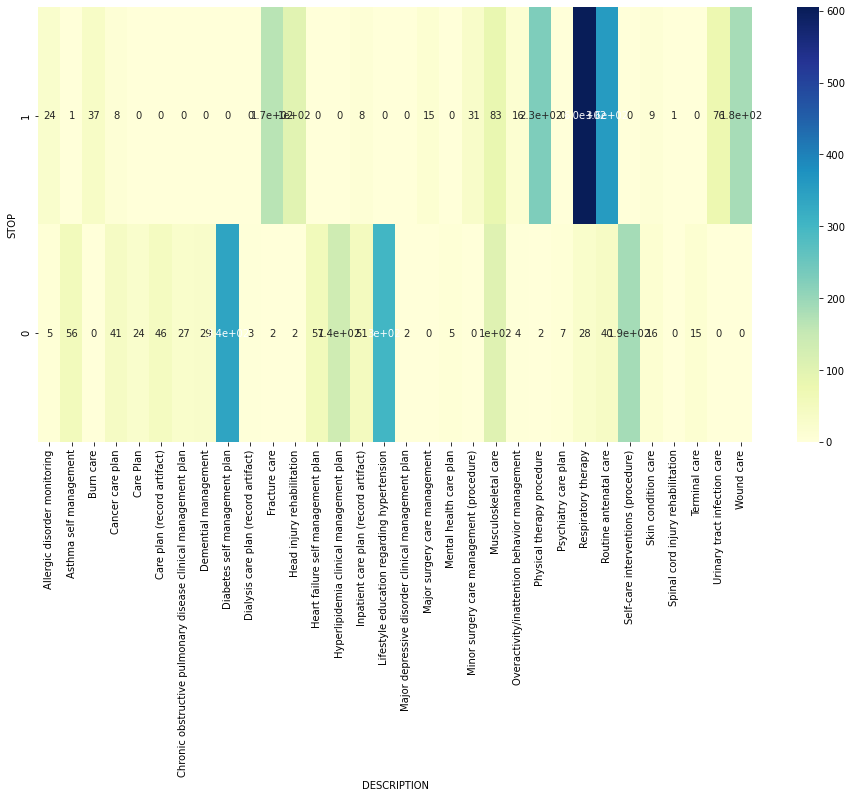

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.0